In [1]:
%pip install yfinance


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 400.0 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached websockets-15.0.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached cffi-1.17.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 409.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
%pip install yfinance ta-lib matplotlib pandas
%pip install TA-Lib‑0.4.0‑cp39‑cp39‑win_amd64.whl  # For Windows users (match Python version)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 376.8/376.8 kB 1.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  error: subprocess-exited-with-error
  
  × Building wheel for ta-lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [64 lines of output]
      <string>:83: UserWarning: Cannot find ta-lib library, installation may fail.
      /tmp/pip-build-env-kpnu512t/overlay/lib/python3.12/site-packages/setuptools/config/_apply_pyprojecttoml.py:82: SetuptoolsWarning: `install_requires` overwritten in `pyproject.toml` (dependencies)
        corresp(dist, value, root_dir)
      /tmp/pip-build-env-kpnu512t/overlay/lib/python3.12/site-packages/setuptools/config/_apply_pyprojecttoml.py:61: Setupto

In [3]:
import yfinance as yf
import pandas as pd


data = yf.download("AAPL", start="2024-01-01", end="2024-05-01")
data.reset_index(inplace=True)
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2024-01-02,184.290405,187.070052,182.553128,185.789422,82488700
1,2024-01-03,182.910522,184.528677,182.096477,182.880742,58414500
2,2024-01-04,180.587555,181.758969,179.565044,180.825800,71983600
3,2024-01-05,179.862808,181.431323,178.860156,180.666932,62303300
4,2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500


In [7]:
%pip install ta-lib

import talib

data['SMA_10'] = talib.SMA(data[('Close', 'AAPL')], timeperiod=10)
data['EMA_10'] = talib.EMA(data[('Close', 'AAPL')], timeperiod=10)

data['RSI'] = talib.RSI(data[('Close', 'AAPL')], timeperiod=14)

data['MACD'], data['MACD_signal'], data['MACD_hist'] = talib.MACD(data[('Close', 'AAPL')])


  Using cached ta_lib-0.6.3.tar.gz (376 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  error: subprocess-exited-with-error
  
  × Building wheel for ta-lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [64 lines of output]
      <string>:83: UserWarning: Cannot find ta-lib library, installation may fail.
      /tmp/pip-build-env-animw5h2/overlay/lib/python3.12/site-packages/setuptools/config/_apply_pyprojecttoml.py:82: SetuptoolsWarning: `install_requires` overwritten in `pyproject.toml` (dependencies)
        corresp(dist, value, root_dir)
      /tmp/pip-build-env-animw5h2/overlay/lib/python3.12/site-packages/setuptools/config/_apply_pyprojecttoml.py:61: SetuptoolsDeprecationWarning: License classifiers are 

ModuleNotFoundError: No module named 'talib'

KeyError: 'SMA_10'

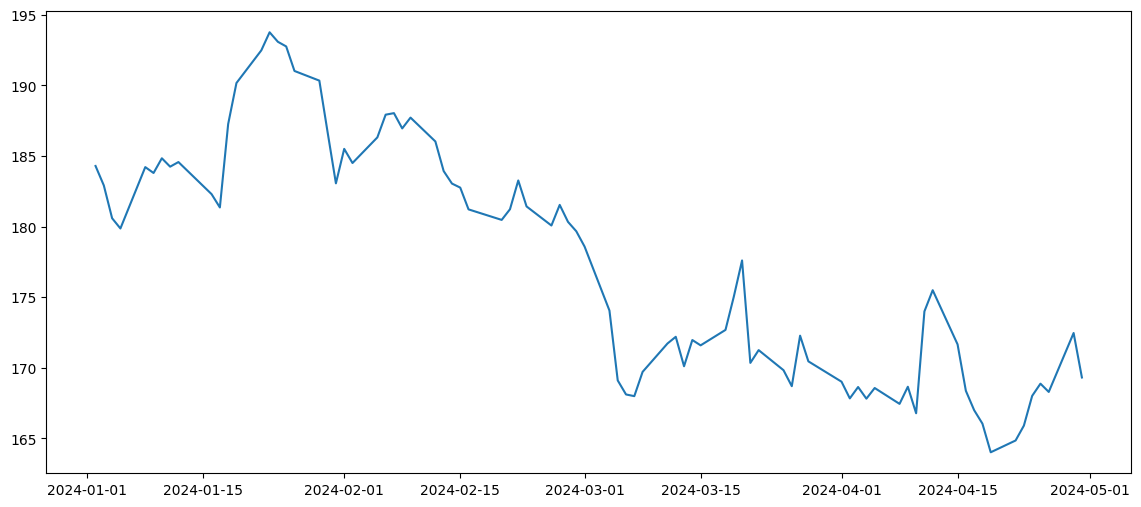

In [8]:
import matplotlib.pyplot as plt

# Plot SMA vs Price
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['SMA_10'], label='SMA 10')
plt.plot(data['Date'], data['EMA_10'], label='EMA 10')
plt.title("SMA and EMA over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(data['Date'], data['RSI'], label='RSI')
plt.axhline(70, color='r', linestyle='--')  # Overbought
plt.axhline(30, color='g', linestyle='--')  # Oversold
plt.title("RSI Indicator")
plt.legend()
plt.grid(True)
plt.show()

# Plot MACD
plt.figure(figsize=(14, 5))
plt.plot(data['Date'], data['MACD'], label='MACD')
plt.plot(data['Date'], data['MACD_signal'], label='Signal Line')
plt.bar(data['Date'], data['MACD_hist'], label='Histogram', color='grey')
plt.title("MACD Indicator")
plt.legend()
plt.grid(True)
plt.show()
